In [31]:
#Train, val, Test splitter
import train_pytorch
import prepare_dataset
import random
import os
import numpy as np
os.chdir("/Users/kjartan/Documents/CompCogSci3/") 
#os.chdir(r"C:\Users\kjart\OneDrive\Dokumenter\KU\3. semester\Cog sci 3\CompCogSci3")

In [4]:
language = "EN"
unsorted_data_dir = "raw_data/derivatives/"
annotation_file = f"raw_data/annotation/{language}/lppEN_word_information.csv"
random.seed(1234)

#prepare_dataset.clear_data_dir()
##the split is (0.8,0.1,0.1)
#prepare_dataset.fill_data_dir(unsorted_data_dir, prepare_dataset.config1, language)


In [5]:
pos = "NOUN"
vocab = ["picture", "forest", "bridge", "golf"]
oov = "-1"
binary = False

#prepare_dataset.prepare_labels(annotation_file, "data/", language, pos=pos, oov=oov)
#prepare_dataset.prepare_handpicked_labels(annotation_file, "data/", vocab)
#binary = prepare_dataset.convert_to_binary_labels("data/", oov, language)

In [30]:
#Exclude data that corresponds to oov
with open("label_dict.txt", "r") as f:
    for i in f.readlines():
        k = i.split("=")
        if k[0].strip() == oov:
            label_2_remove = int(k[1].strip("\n "))
            break

labels_dict = {}
for i in os.listdir("data"):
    if os.path.isdir("data/"+i):
        for phase in os.listdir("data/"+i):
            for run in range(9):
                labels = np.loadtxt(f"data/{i}/{run}/{language}/labels.txt")
                labels_dict[run] = labels

exlusion_idxs = {[]*k for k in range(9)}

for run in labels_dict.keys():
    for idx, label in enumerate(labels_dict[run]):
        if label==label_2_remove:
            exlusion_idxs[run].append(idx)


for i in os.listdir("data"):
    if os.path.isdir("data/"+i):
        for phase in os.listdir("data/"+i):
            for run in range(9):
                path = f"data/{i}/{run}/{language}/labels.txt"
                with open(path, "r") as f:
                    lines = f.readlines()
                with open(path, "w") as f:
                    for line in lines:
                        if line.strip("\n ") == str(label_2_remove):
                            print(line)
                            #f.write(line)

for i in os.listdir("data"):
    if os.path.isdir("data/"+i):
        for phase in os.listdir("data/"+i):
            for run in range(9):
                path = f"data/{i}/{run}/{language}/"
                for file in os.listdir(path):
                    file_path = f"data/{i}/{run}/{language}/{file}"
                    idx = file.split("_")[-1][:-4]
                    if idx in exlusion_idxs:
                        print(file)
                        #shutil.remove(file)


.DS_Store
Train
Train
Val
Val


In [7]:
train_pytorch.train(binary=binary, batch_size = 100, num_epochs = 1, config="config1_EN", model = "2d")

FileNotFoundError: [Errno 2] No such file or directory: 'label_dict.txt'

  0%|          | 0/167 [00:00<?, ?it/s]

Test Accuracy: 0.0000


(M2DCNN(
   (up_conv): Conv2d(
     (conv_block): Sequential(
       (0): Conv2d(73, 16, kernel_size=(3, 3), stride=(1, 1))
       (1): mish()
       (2): MaxPool2d(kernel_size=(2, 2), stride=(2, 2), padding=0, dilation=1, ceil_mode=False)
       (3): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
       (4): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1))
       (5): mish()
       (6): MaxPool2d(kernel_size=(2, 2), stride=(2, 2), padding=0, dilation=1, ceil_mode=False)
       (7): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
     )
   )
   (front_conv): Conv2d(
     (conv_block): Sequential(
       (0): Conv2d(90, 16, kernel_size=(3, 3), stride=(1, 1))
       (1): mish()
       (2): MaxPool2d(kernel_size=(2, 2), stride=(2, 2), padding=0, dilation=1, ceil_mode=False)
       (3): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
       (4): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1)

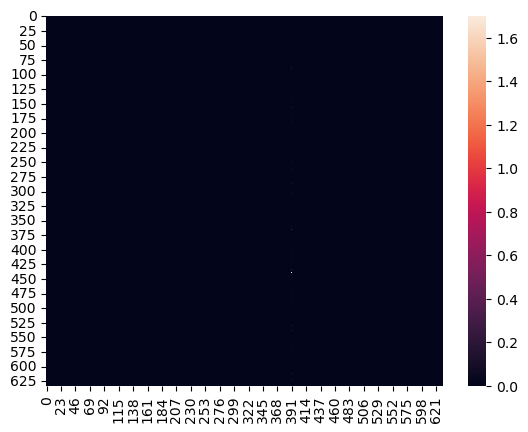

In [ ]:
import model_m2dcnn as model
from torch.utils.data import DataLoader
from dataset import lpp_Dataset

batch_size=100

test_dataloader = DataLoader(lpp_Dataset("data/Test/"), batch_size=batch_size, shuffle=False)
if binary:
        nb_classes = 2
else:
    with open("label_dict.txt", "r") as f:
        nb_classes = len(f.readlines())
        
train_pytorch.test(model.M2DCNN(numClass=nb_classes, numFeatues=30880, DIMX=74, DIMY=90, DIMZ=73), "results/3d_weights.pth", nb_classes, test_dataloader)

In [35]:
"ok\n ".strip("\n ") 

'ok'